In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [2]:
np.set_printoptions(precision = 4, suppress = True)
%matplotlib inline
plt.figure(figsize=(10,3))
plt.style.use('seaborn-whitegrid')

<Figure size 720x216 with 0 Axes>

In [3]:
df = pd.read_csv('mtcars.csv')
df=df.head(10)

In [4]:
x = df.ix[:,(1,3)].values
x

C:\Users\rishy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\rishy\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


array([[ 21. , 160. ],
       [ 21. , 160. ],
       [ 22.8, 108. ],
       [ 21.4, 258. ],
       [ 18.7, 360. ],
       [ 18.1, 225. ],
       [ 14.3, 360. ],
       [ 24.4, 146.7],
       [ 22.8, 140.8],
       [ 19.2, 167.6]])

In [5]:
z = linkage(x,'ward')
z

array([[  0.    ,   1.    ,   0.    ,   2.    ],
       [  4.    ,   6.    ,   4.4   ,   2.    ],
       [  7.    ,   8.    ,   6.1131,   2.    ],
       [  9.    ,  10.    ,   9.0185,   3.    ],
       [ 12.    ,  13.    ,  29.5183,   5.    ],
       [  3.    ,   5.    ,  33.1646,   2.    ],
       [  2.    ,  14.    ,  60.7198,   6.    ],
       [ 15.    ,  16.    , 163.4024,   8.    ],
       [ 11.    ,  17.    , 338.6289,  10.    ]])

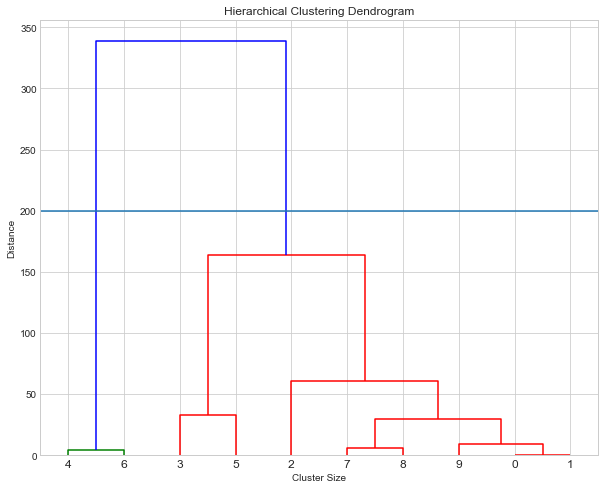

In [6]:
plt.figure(figsize=(10, 8))
dendrogram(z, truncate_mode ='lastp', p = len(df), show_contracted = True)
plt.title ('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=200)
plt.show()

In [7]:
Hcl = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
Hcl.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [8]:
y = df.ix[:,(9)].values
sm.accuracy_score(y, Hcl.labels_)

C:\Users\rishy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0.5

In [9]:
aa=Hcl.labels_
bb=[]
for i in aa:
    if i==0:
        bb.append('y')
    elif i==1:
        bb.append('b')

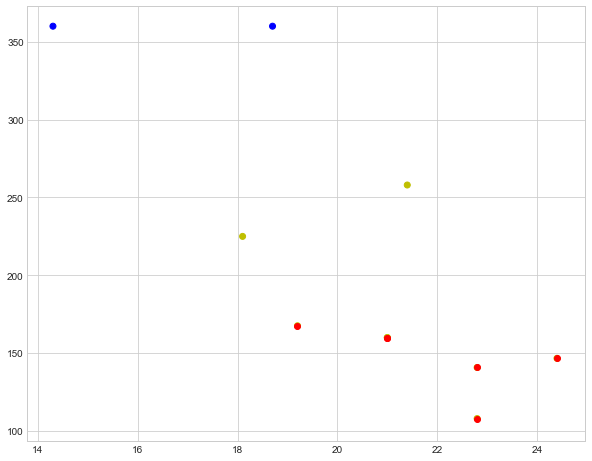

In [10]:
X=x
idxs = [0,1,9,7,2,8]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=bb)
plt.scatter(X[idxs,0], X[idxs,1], c='r')
plt.show()#here there are only 9 dots in the graph because row 1st and 2nd of x ....they both the dots are overlaping 